In [17]:
from landslide4sense.data import LandslideDataSet
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import omegaconf
cfg = omegaconf.OmegaConf.load("../conf/config.yaml")
cfg

{'data': {'dir': '${hydra:runtime.cwd}/data/', 'train_list': '${hydra:runtime.cwd}/data/train_split_train.txt', 'eval_lists_paths': ['${hydra:runtime.cwd}/data/train_split_train.txt', '${hydra:runtime.cwd}/data/train_split_val.txt'], 'eval_names': ['train', 'val'], 'test_list': '${hydra:runtime.cwd}/data/valid.txt', 'input_size': [128, 128], 'augmentation': {'module': 'landslide4sense.data.augmentations', 'name': 'transforms'}}, 'model': {'restore_from': None, 'module': 'landslide4sense.models', 'name': 'Unet', 'args': {'n_classes': 2}}, 'optimizer': {'restore_from': None, 'module': 'torch.optim', 'name': 'SGD', 'args': {'lr': 0.02, 'weight_decay': 0.0005, 'momentum': 0.9}}, 'loss': {'module': 'torch.nn', 'name': 'CrossEntropyLoss', 'args': {'ignore_index': 255, 'weight': [1, 1.5]}}, 'train': {'start_epoch': 0, 'steps_per_epoch': 34, 'batch_size': 100, 'num_workers': 2, 'num_steps': 10000, 'num_steps_stop': 10000, 'gpu_id': 0, 'snapshot_dir': '/content/drive/MyDrive/data_science_projec

In [3]:
dataset = LandslideDataSet(
    "../data/",
    "../data/train_split_train.txt",
    max_iters=cfg.train.num_steps_stop * cfg.train.batch_size,
    set="labeled",
)

In [4]:
img, label, shape, name = next(iter(dataset))

In [5]:
img.shape

(14, 128, 128)

In [6]:
rimg = img.transpose(1, 2, 0)

In [7]:
mean = [
    -0.4914,
    -0.3074,
    -0.1277,
    -0.0625,
    0.0439,
    0.0803,
    0.0644,
    0.0802,
    0.3000,
    0.4082,
    0.0823,
    0.0516,
    0.3338,
    0.7819,
]

std = [
    0.9325,
    0.8775,
    0.8860,
    0.8869,
    0.8857,
    0.8418,
    0.8354,
    0.8491,
    0.9061,
    1.6072,
    0.8848,
    0.9232,
    0.9018,
    1.2913,
]

0.7186465 1.389623


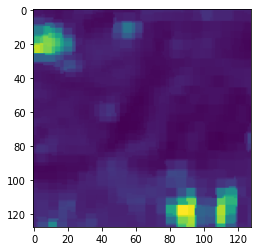

0.6087566 2.3440766


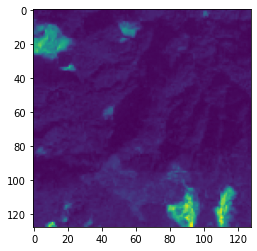

0.4461753 3.010176


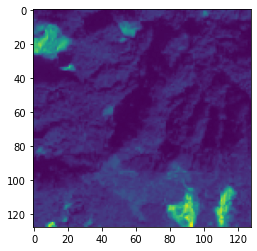

0.33694774 4.6543713


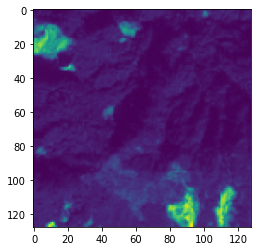

0.18734759 3.0625913


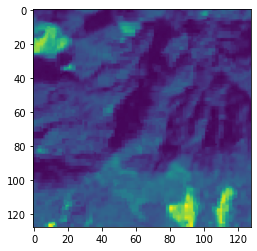

0.08916254 1.6740592


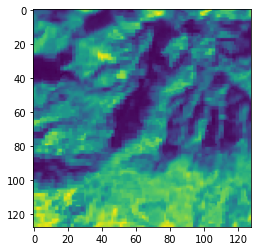

0.067841776 1.7205286


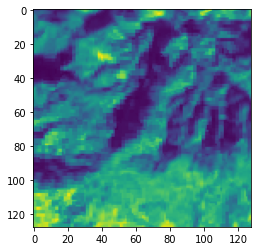

0.06335887 2.0743597


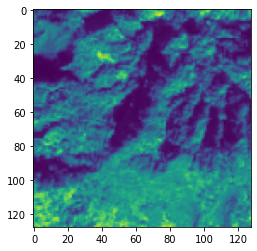

0.054889977 2.3216977


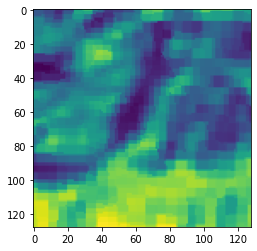

0.6631392 2.5420337


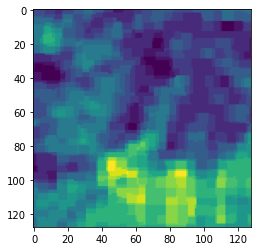

0.03231646 2.3447387


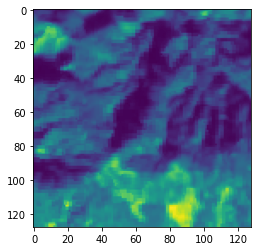

0.013464026 3.7776206


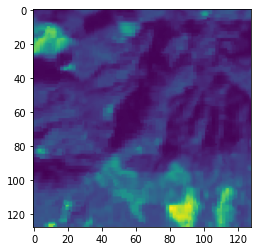

0.04927981 3.548147


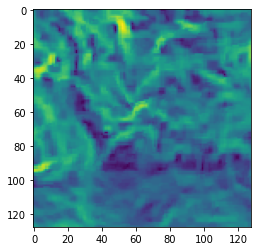

2.873848 3.5505803


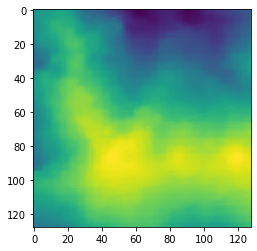

In [10]:
for i in range(rimg.shape[-1]):
    rescaled = (rimg[..., i] * std[i]) + mean[i]
    print(rescaled.min(), rescaled.max())
    plt.imshow(rescaled)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


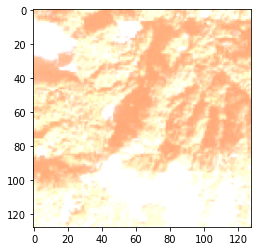

In [15]:
plt.imshow(rimg[..., 1:4])

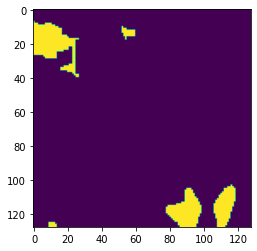

In [12]:
plt.imshow(label)

# Image segmentation

In [111]:
aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.Transpose(p=0.5),
        A.RandomSizedCrop(
            min_max_height=(100, 100), 
            height=128, 
            width=128, 
            p=0.5
        ),
        A.ShiftScaleRotate(p=.5)
    ],
)

augmented = aug(image = np.array(img.transpose(1, 2, 0)), mask=label)
augmented_img = augmented["image"]
augmented_mask = augmented["mask"] 

In [108]:
def visualize(img, mask):
    nrows, ncols = 2, img.shape[0] // 2
    fig = plt.figure(figsize=(5*ncols + 1, 5*nrows)) 
    k = 1
    
    for i in range(nrows):
        for j in range(ncols):
            channel = img[k-1, ...]
            ax = fig.add_subplot(5, 5, k)
            ax.imshow(channel)
            k += 1

    ax = fig.add_subplot(5, 5, 15)
    ax.imshow(mask)
    plt.tight_layout()
    return fig

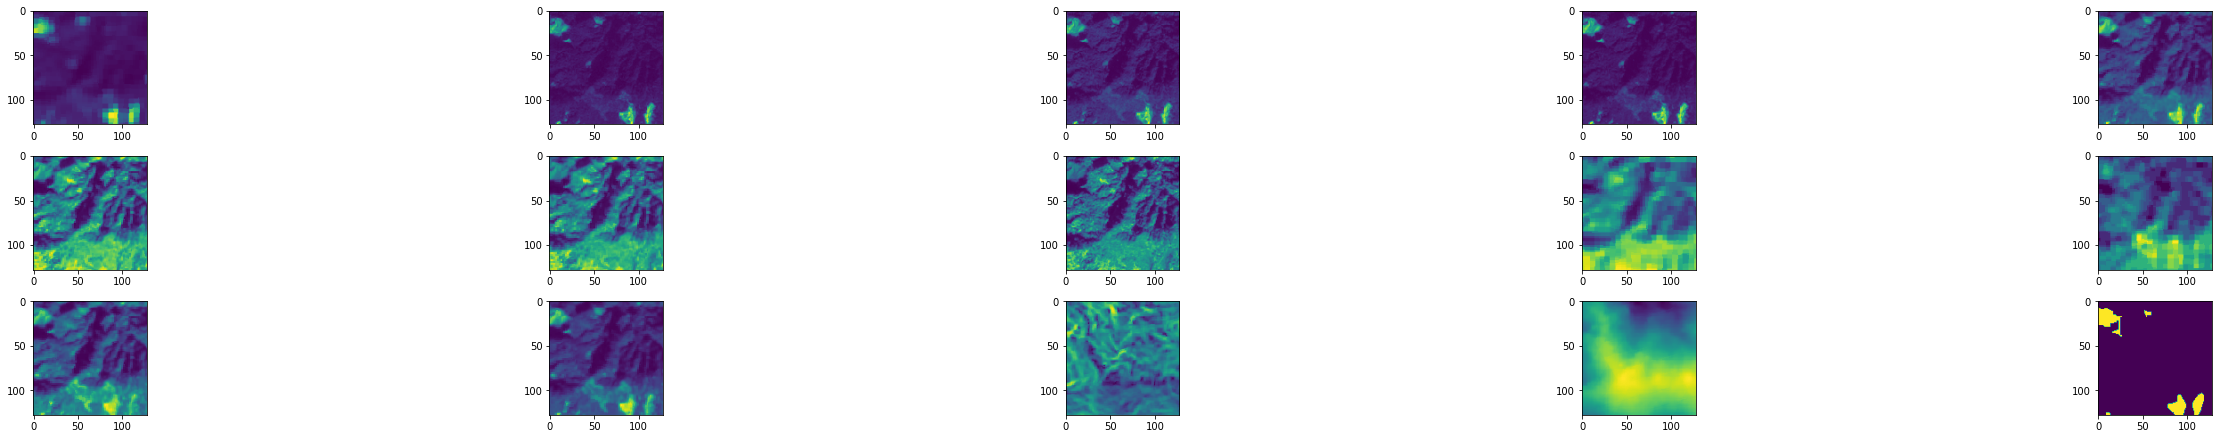

In [99]:
fig = visualize(img, label)
plt.show()

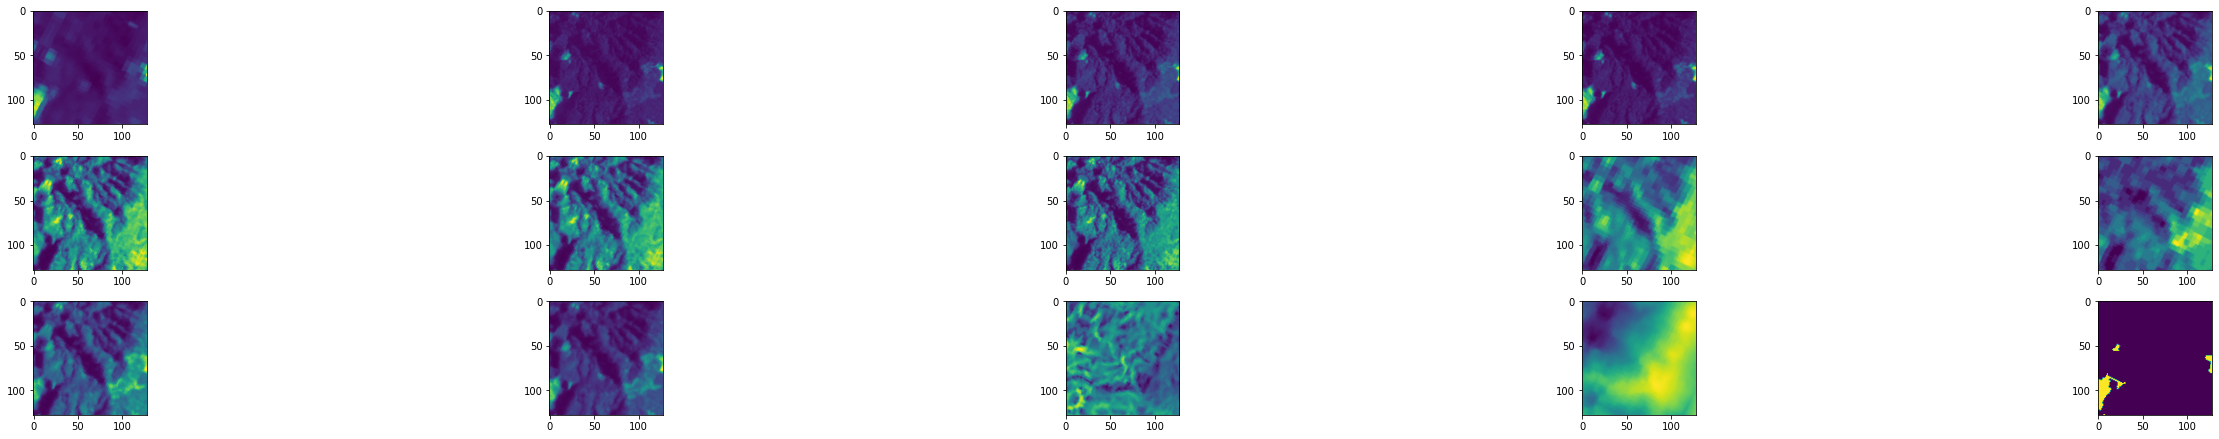

In [112]:
fig = visualize(augmented_img.transpose(2, 0, 1), augmented_mask)
plt.show()